Data analytics is the process of examining, cleaning, transforming, and modeling data to discover useful insights, draw conclusions, and support decision-making.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])

In [3]:
model=np.polyfit(x,y,1)

In [4]:
predict=np.poly1d(model)
predict(65)

68.63013698630135

In [5]:
y_pred=predict(x)
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [6]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.4803218090889323

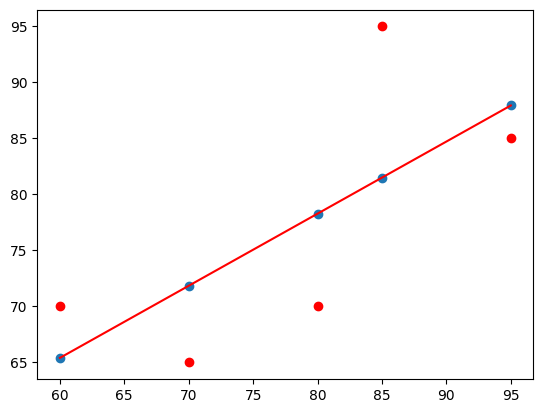

In [7]:
y_line = model[1] + model[0]* x
plt.plot(x, y_line, c = 'r')
plt.scatter(x, y_pred)
plt.scatter(x,y,c='r')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fetch_california_housing() loads the California housing dataset (similar to the Boston dataset but more modern and larger).

housing.data contains the features (e.g., income, house age, number of rooms).

pd.DataFrame(housing.data) converts it into a pandas DataFrame.

In [17]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
data=pd.DataFrame(housing.data)

In [19]:
data.columns = housing.feature_names
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


you're adding a new column called 'PRICE' to your DataFrame data, where each row represents the target value (i.e., the median house value in $100,000s for that row's features).

In [20]:
data['PRICE']=housing.target

In [21]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [23]:
x=data.drop(['PRICE'],axis=1)
y=data['PRICE']

sklearn.model_selection is a module in scikit-learn that provides tools to split datasets, select models, and evaluate model performance reliably.

train_test_split() is a function from model_selection used to split your dataset into two parts:
    Training Set
    Testing Set

| Variable         | Description                                                        |
| ---------------- | ------------------------------------------------------------------ |
| `x`              | Feature variables (independent variables, e.g., area, rooms, etc.) |
| `y`              | Target variable (dependent variable, e.g., house price)            |
| `xtrain`         | 80% of `x`, used to train the model                                |
| `xtest`          | 20% of `x`, used to test the model                                 |
| `ytrain`         | 80% of `y`, targets for training                                   |
| `ytest`          | 20% of `y`, targets for testing                                    |
| `test_size=0.2`  | Means 20% of the data will be used for testing, rest for training  |
| `random_state=0` | Fixes the randomness so the split is reproducible                  |


In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

trains the linear regression model using your training data:
    xtrain: features (input variables)
    ytrain: target (house prices)

In [27]:
model=lm.fit(xtrain,ytrain)

You're using the trained model to make predictions:
    ytrain_pred: Predictions on the training set (xtrain).
    ytest_pred: Predictions on the test set (xtest).

In [29]:
ytrain_pred=lm.predict(xtrain)
ytest_pred=lm.predict(xtest)

In [ ]:
train_df = pd.DataFrame({'Actual' : ytrain , 'Predicted' : ytrain_pred})
test_df = pd.DataFrame({'Actual': ytest, 'Predicted': ytest_pred})

In [39]:
train_df.head()

,Actual,Predicted
12069,5.00001,1.725911
15925,2.70000,2.885439
11162,1.96100,2.200646
4904,1.18800,1.382820
4683,2.25000,2.220702


In [40]:
test_df.head()

,Actual,Predicted
14740,1.369,2.281107
10101,2.413,2.790091
20566,2.007,1.903328
2670,0.725,1.017603
15709,4.600,2.948524


Mean Squared Error (MSE) is a common metric used to evaluate the performance of regression models. It measures the average of the squared differences between the predicted values and the actual values. In other words, it tells you how far off your model's predictions are from the actual values on average.

R-Squared Score:
It measures how well the model's predictions match the actual data. R² values range from 0 to 1, where 1 indicates perfect predictions, and 0 indicates no better than predicting the mean.

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

If MSE = 0: This means the model perfectly predicts the target values (which is very rare in real-world scenarios).

If MSE > 0: It shows some error between the predicted and actual values. The higher the MSE, the more error there is.

In [48]:
mse = mean_squared_error(ytest,ytest_pred)
print(mse)

0.528984167036721


In [44]:
mse = mean_squared_error(ytrain_pred,ytrain)
print(mse)

0.5234413607125448


In [50]:
r2_test = r2_score(ytest, ytest_pred)
print(r2_test)

0.5943232652466202


In [51]:
r2_train = r2_score(ytrain, ytrain_pred)
print(r2_train)

0.6088968118672871


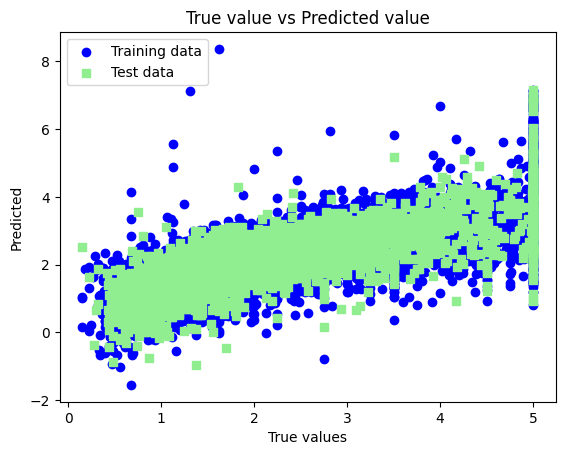

In [47]:
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
# plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()